<a href="https://colab.research.google.com/github/Vanitha-Jain/capstone/blob/Model-building/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K Means Clustering

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np


In [ ]:
df=pd.read_excel("/content/New_Unknown.xlsx")
df

,Compounds name,Antioxidant,Antiinflammatory,Anti tumor,OPP
0,Gossypin,1,1,1,0
1,Quercetin,1,1,0,1
2,Farnesol,1,1,0,1
3,Limonene,1,0,0,1
4,Curcumenol,1,1,1,1
...,...,...,...,...,...
283,Ishwarane,1,1,0,1
284,seselin,1,1,0,1
285,Blighinone,1,0,0,1
286,Hydroquinone,1,0,0,1


In [ ]:
print(df.head())  # Check if the column name has changed
print(df.columns)


  Compounds name  Antioxidant  Antiinflammatory  Anti tumor  OPP
0       Gossypin            1                 1           1    0
1      Quercetin            1                 1           0    1
2       Farnesol            1                 1           0    1
3       Limonene            1                 0           0    1
4     Curcumenol            1                 1           1    1
Index(['Compounds name', 'Antioxidant', 'Antiinflammatory', 'Anti tumor',
       'OPP'],
      dtype='object')


In [ ]:
# Feature selection
feature_columns = ["Antioxidant", "Antiinflammatory", "Anti tumor", "OPP"]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_columns])


In [ ]:
# Handle NaN or infinite values if present
if np.any(np.isnan(df[feature_columns])) or np.any(np.isinf(df[feature_columns])):
    df = df.dropna(subset=feature_columns)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[feature_columns])

print("Number of compounds in each cluster:")
print(df['Cluster'].value_counts())

Number of compounds in each cluster:
Cluster
2    67
0    62
3    57
1    55
4    47
Name: count, dtype: int64


In [ ]:
# Calculate cluster means
cluster_means = df.groupby('Cluster')[feature_columns].mean()
print("Mean Values for Each Cluster:")
print(cluster_means)

Mean Values for Each Cluster:
         Antioxidant  Antiinflammatory  Anti tumor  OPP
Cluster                                                
0                1.0               0.0    0.225806  1.0
1                1.0               1.0    1.000000  1.0
2                1.0               1.0    0.000000  1.0
3                1.0               1.0    0.315789  0.0
4                1.0               0.0    0.319149  0.0


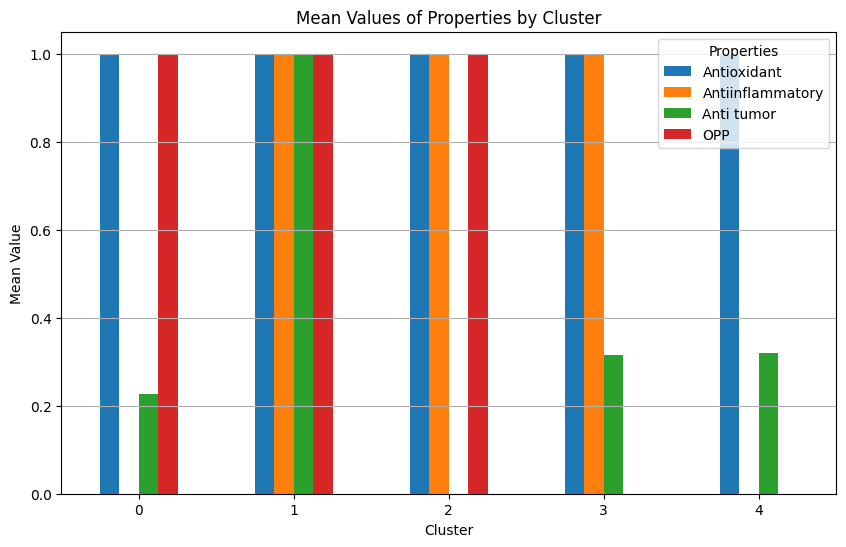

In [ ]:
# Plot mean values of properties per cluster
ax = cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values of Properties by Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Properties')
plt.show()

In [ ]:
# Save cluster distribution
cluster_distribution = df['Cluster'].value_counts().reset_index()
cluster_distribution.columns = ['Cluster', 'Number of Compounds']
cluster_distribution.to_excel('Cluster_Distribution.xlsx', index=False)

In [ ]:
# Save compound clustering results
grouped = df.groupby('Cluster')['Compounds name'].apply(list).reset_index()
grouped.columns = ['Cluster', 'Compounds']
compounds_expanded = grouped['Compounds'].apply(pd.Series)
compounds_expanded.columns = [f'Compound {i+1}' for i in range(compounds_expanded.shape[1])]
final_output = pd.concat([grouped[['Cluster']], compounds_expanded], axis=1)
final_output.to_excel('Compounds_by_Cluster.xlsx', index=False)
print(final_output)


   Cluster   Compound 1    Compound 2   Compound 3    Compound 4  \
0        0     Limonene  Matairesinol      Choline    Eucalyptol   
1        1   Curcumenol         Rutin      Harmine  Cycloartanol   
2        2    Quercetin      Farnesol  Taxiphyllin        Elemol   
3        3     Gossypin     Carvacrol      Vitexin  Santarubin C   
4        4  Hopeaphenol       Abiesin      Betaine     Friedelin   

      Compound 5     Compound 6    Compound 7         Compound 8  \
0   Trigonelline  Palmitic acid  Isorhamnetin  Echinocystic acid   
1         Thymol      Leurosine    Nevadensin          Corilagin   
2     Hesperidin        Carvone        Lupeol         Kaempferol   
3  beta-Carotene     T-Muurolol   Loroglossin       Dracooxepine   
4    Citronellal        Abrusin       Phorbol          Verbenone   

       Compound 9  ... Compound 58    Compound 59    Compound 60  Compound 61  \
0      Afzelechin  ...    Tyramine  Dotriacontane  Jatrorrhizine   Blighinone   
1         Bilobol  .

In [ ]:
# Compute Silhouette Score
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

silhouette_df = pd.DataFrame({'Silhouette Score': [silhouette_avg]})
silhouette_df.to_excel('Clustering_Silhouette_Score.xlsx', index=False)

Silhouette Score: 0.773257068108046


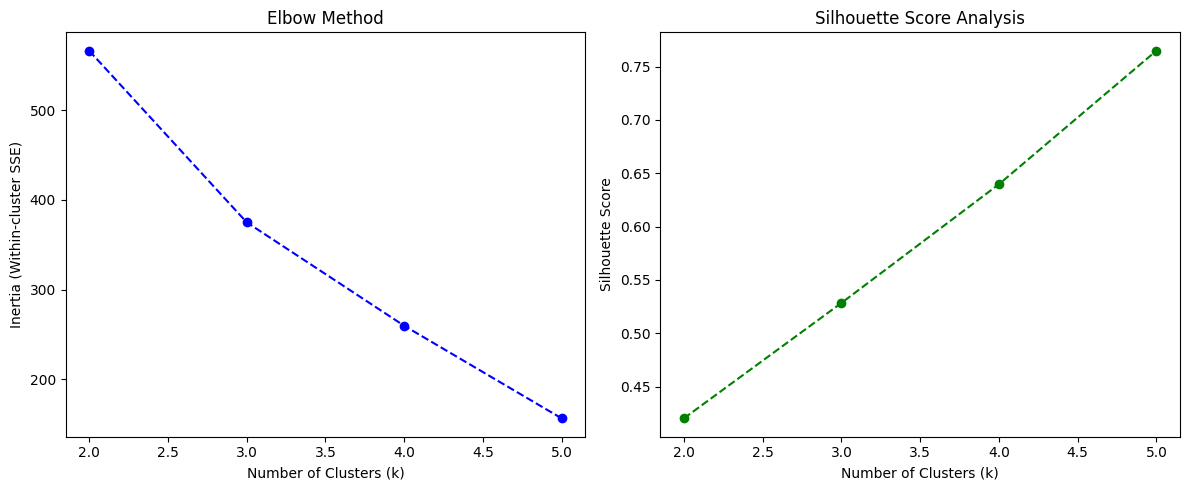

In [ ]:
inertia = []
silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.figure(figsize=(12, 5))

# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method")

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")

plt.tight_layout()
plt.show()

In [ ]:
# Calculate a composite ranking score for each cluster
cluster_means['Ranking Score'] = cluster_means.sum(axis=1)
# Rank clusters based on the composite score in descending order
cluster_ranking = cluster_means[['Ranking Score']].sort_values(by='Ranking Score', ascending=False)
cluster_ranking['Rank'] = range(1, len(cluster_ranking) + 1)
# Save the ranking to an Excel file
cluster_ranking.to_excel('Cluster_Ranking.xlsx', index_label='Cluster')
# Display the ranking
print("Cluster Ranking based on composite score:")
print(cluster_ranking)

Cluster Ranking based on composite score:
         Ranking Score  Rank
Cluster                     
1             4.000000     1
2             3.000000     2
3             2.315789     3
0             2.225806     4
4             1.319149     5
